In [ ]:
import tensorflow
print(tensorflow.__version__)

2.8.0


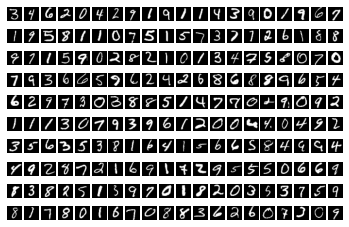

In [ ]:
# Import libraries and modules 
# Import libraries and modules 
import numpy as np 
import time 
np.random.seed(123) # for reproducibility 

from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix 

import tensorflow as tf
from tensorflow import keras
from keras import Sequential, Model, Input 
from keras.layers import Conv2DTranspose, Reshape, Dense, Activation, Flatten, Dropout, Convolution2D, MaxPooling2D, Input 
#import utilitaire
#from utilitaire import affiche
################################################## 
# I - Load pre-shuffled MNIST data train and test sets 
################################################## 
from keras.datasets.mnist import load_data 
from matplotlib import pyplot 
# load dataset 
(X_train, y_train), (X_test, y_test) = load_data()   #charge la data
X_train, pipo, y_train, pipo = train_test_split(X_train, y_train, test_size=0.9, random_state=42)   #separe la base de donnée en train
X_test, pipo, y_test, pipo = train_test_split(X_test, y_test, test_size=0.9, random_state=42)  #separe la base de donnée en test

for i in range(200):   #affiche les 200 premieres images de la base de train
  plt.subplot(10,20,i+1) 
  plt.imshow(X_train[i,:].reshape([28,28]), cmap='gray')   
  plt.axis('off') 
plt.show() 

# Preprocess input data 
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1) 
X_test = X_test.reshape(X_test.shape[0], X_train.shape[1], X_train.shape[2], 1) 
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
X_train /= 255 
X_test /= 255 

# Preprocess class labels
Y_train = tf.keras.utils.to_categorical(y_train, 10) 
Y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
print('La dimension de X_test est:',np.shape(X_test))
print('La dimension de X_train est:',np.shape(X_train))
print('La dimension de y_test est:',np.shape(y_test))
print('La dimension de y_train est:',np.shape(y_train))
print('Le nombre de classe est:', len(np.unique(y_train)))


La dimension de X_test est: (1000, 28, 28, 1)
La dimension de X_train est: (6000, 28, 28, 1)
La dimension de y_test est: (1000,)
La dimension de y_train est: (6000,)
Le nombre de classe est: 10


In [ ]:
#tf.keras.utils.to_categorical #Converts a class vector (integers) to binary class matrix
print('La dimension de y_train est:',np.shape(y_train))
print('La dimension de Y_train est:',np.shape(Y_train))

La dimension de y_train est: (6000,)
La dimension de Y_train est: (6000, 10)


In [ ]:
#A chaque fois qu'on modifie le nb d'epochs ou de batch ou le learning rate, il faut relancer ce bloc pour reinitialiser le modèle

inputs = Input(shape=(28,28,1)) 
x = inputs 
x=Flatten()(x) 
outputs=Dense(10, activation='softmax')(x)  #(here is a usage of softmax in a Dense layer)
model = Model(inputs, outputs) 
model.summary()

#tf.keras.activations.softmax(x, axis=-1) #(here is a standalone usage of softmax) #Softmax converts a vector of values to a probability distribution.
#x = Input tensor.
#axis	= Integer, axis along which the softmax normalization is applied.
#Returns = Tensor, output of softmax transformation (all values are non-negative and sum to 1).

#Flatten sert à applatir une matrix en un array d'une dimension (vecteur??)

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#il y a 7850 parametre a apprendre ????

In [ ]:
def affiche(history): 
  # summarize history for accuracy 
  plt.plot(history.history['accuracy']) 
  plt.plot(history.history['val_accuracy']) 
  plt.title('model accuracy') 
  plt.ylabel('accuracy') 
  plt.xlabel('epoch') 
  plt.legend(['train', 'test'], loc='upper left') 
  plt.show() 
  # summarize history for loss 
  plt.plot(history.history['loss']) 
  plt.plot(history.history['val_loss']) 
  plt.title('model loss') 
  plt.ylabel('loss') 
  plt.xlabel('epoch') 
  plt.legend(['train', 'test'], loc='upper left') 
  plt.show()

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


24/24 [==============================] - 1s 11ms/step - loss: 1.5998 - accuracy: 0.5885 - val_loss: 1.0952 - val_accuracy: 0.7810
Epoch 2/50
24/24 [==============================] - 0s 5ms/step - loss: 0.9379 - accuracy: 0.8122 - val_loss: 0.7972 - val_accuracy: 0.8270
Epoch 3/50
24/24 [==============================] - 0s 5ms/step - loss: 0.7379 - accuracy: 0.8403 - val_loss: 0.6757 - val_accuracy: 0.8510
Epoch 4/50
24/24 [==============================] - 0s 4ms/step - loss: 0.6406 - accuracy: 0.8543 - val_loss: 0.5986 - val_accuracy: 0.8570
Epoch 5/50
24/24 [==============================] - 0s 5ms/step - loss: 0.5807 - accuracy: 0.8663 - val_loss: 0.5559 - val_accuracy: 0.8640
Epoch 6/50
24/24 [==============================] - 0s 4ms/step - loss: 0.5398 - accuracy: 0.8733 - val_loss: 0.5203 - val_accuracy: 0.8730
Epoch 7/50
24/24 [==============================] - 0s 6ms/step - loss: 0.5099 - accuracy: 0.8783 - val_loss: 0.4952 - val_accuracy: 0.8750
Epoch 8/50
24/24 [============

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


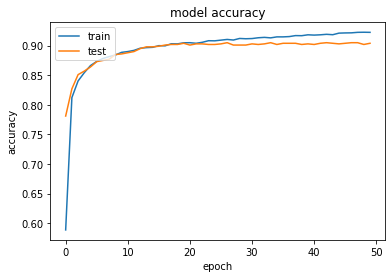

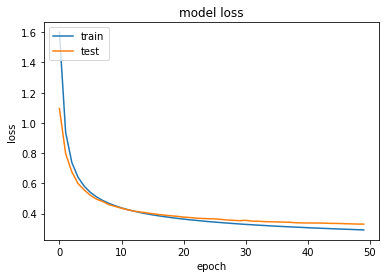

lr= 0.1 batch_size= 256 epochs= 50
Temps d apprentissage 7.018247000000031


In [ ]:
lr=0.1  #learning rate
batch_size=256 
epochs=50
sgd1= tf.keras.optimizers.SGD(learning_rate=lr) 
model.compile(loss='categorical_crossentropy', optimizer=sgd1, metrics=['accuracy']) 
tps1 = time.clock() 
history =model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1,validation_data=(X_test, Y_test)) 
tps2 = time.clock() 
#from utilitaire import affiche 
affiche(history) #donnee en annexe 
print('lr=',lr,'batch_size=',batch_size, 'epochs=',epochs) 
print('Temps d apprentissage',tps2 - tps1)

#The batch size is a number of samples processed before the model is updated.
#The number of epochs is the number of complete passes through the training dataset.
#The size of a batch must be more than or equal to one and less than or equal to the number of samples in the training dataset.
#The number of epochs can be set to an integer value between one and infinity. You can run the algorithm for as long as you like and even stop it using other criteria besides a fixed number of epochs, such as a change (or lack of change) in model error over time.

#Finally, let’s make this concrete with a small example.
#Assume you have a dataset with 200 samples (rows of data) and you choose a batch size of 5 and 1,000 epochs.
#This means that the dataset will be divided into 40 batches, each with five samples. The model weights will be updated after each batch of five samples.
#This also means that one epoch will involve 40 batches or 40 updates to the model.
#With 1,000 epochs, the model will be exposed to or pass through the whole dataset 1,000 times. That is a total of 40,000 batches during the entire training process.



#Categorical Cross Entropy in Keras
#It is used for the classification models where the target classes are more than two. It is a generalization of binary cross-entropy.
#(Binary Cross Entropy in Keras - It is used to calculate the loss of classification model where the target variable is binary like 0 and 1.)
#Cross-Entropy (aka log loss): calculates the differences between the predicted class probabilities and those from ground truth across a logarithmic scale. Useful for object detection.

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]*100) 
y_pred = model.predict(X_test) 
y_pred = y_pred.argmax(axis=-1) 
print('Confusion Matrix') 
print(confusion_matrix(y_test, y_pred))

Test loss: 0.3304634392261505
Test accuracy: 90.39999842643738
Confusion Matrix
[[114   0   1   1   0   0   3   0   0   0]
 [  0 119   1   1   0   0   1   0   2   0]
 [  0   3  77   3   1   0   0   6   4   1]
 [  0   0   1 102   0   4   0   2   2   2]
 [  0   0   0   1  98   0   0   0   0   4]
 [  1   1   0   5   1  57   2   2   8   0]
 [  0   0   1   0   0   0  90   0   0   0]
 [  0   2   1   1   1   0   0  84   0   7]
 [  0   0   0   2   0   6   0   0  85   0]
 [  1   1   1   0   4   2   0   2   0  78]]


In [ ]:
#Model.predict passes the input vector through the model and returns the output tensor for each datapoint. 
#Since the last layer in your model is a single Dense neuron, the output for any datapoint is a single value. 
#And since you didn't specify an activation for the last layer, it will default to linear activation.

#y_pred.argmax(axis=-1) is use to find the predicted class for each test example